#### Objective:
    The objective of creating the model is to predict from the census population survey data, is an individual earning more than 50k or less than 50k using various features like Age, Education , Race etc. etc.
    
#### Applications:
    This model will help us in predicting income of an individual based on certain socio-economic features and also will provide us with the information about the dependency of indivduals earnings on various features and will help government and other related entities to plan  better policies for various groups of population. 
    
#### Problem Framing:
    We have dataset with target feature, 'Income Level'.This feature is a categorical feature with 2 distinct values, less than or equal to 50k or greater than 50k. So we have a problem with Supervised Binary Classification type.

#### Performance measurement:
    We will measure performance of our model with the help of "accuracy score" and "f1-score". "accuracy score" is a measure of correct classification of the predicted target feature as compared to the actual target feature. 'f1-score' is harmonic mean of 'precision' metric and 'recall' metric, and it will be more useful than 'accuracy score' as we have imbalanced dataset.
    
#### Source and Assumptions:
    This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

### Load the necessary libraries

In [74]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')


# data wrangling and analysis library
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn

#for Label encoding of categorical variables
from sklearn.preprocessing import LabelEncoder

# for feature selection
from sklearn.decomposition import PCA

# for feature scaling
from sklearn.preprocessing import StandardScaler

# to handle target feature data imbalance
from imblearn.over_sampling import RandomOverSampler

# 
from sklearn.model_selection import train_test_split


# logistic regression
from sklearn.linear_model import LogisticRegression

# import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#classification libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

# for performance tuning
from sklearn.model_selection import GridSearchCV

### Loading the dataset

In [3]:
data1_train=pd.read_csv('census income prediction.csv')

## Step 1 - Descriptive analysis

In [4]:
data1_train.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
data1_train.shape

(32560, 15)

The census dataset we are anlysing has 32560 records divided among 14 independent features based on which target feature 'Income', would be predicted.

In [6]:
data1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


All features have 32560 records of non-null data. We will check for duplicate records.

Feature datatypes:

       int64 - 6 features
       object - 9 features

In [7]:
dup_train=data1_train[data1_train.duplicated()]
dup_train

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [8]:
dup_train.shape

(24, 15)

We have encountered 24 duplicated records. We will remove these records.

In [9]:
data1_train.drop_duplicates(inplace=True,ignore_index=True)

In [10]:
data1_train.shape

(32536, 15)

Now our dataset has 32546 records of data instead of 32560 records.

#### statistical summary of numerical features

In [11]:
data1_train.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The high standard deviation value for Age,Capital_gain,Capital_loss and Hours_per_week features means the data for these feauters is spread away from the mean. 

#### check for null values

In [12]:
print(round((data1_train.isnull().sum()/data1_train.shape[0])*100,2).astype(str)+"%")

Age               0.0%
Workclass         0.0%
Fnlwgt            0.0%
Education         0.0%
Education_num     0.0%
Marital_status    0.0%
Occupation        0.0%
Relationship      0.0%
Race              0.0%
Sex               0.0%
Capital_gain      0.0%
Capital_loss      0.0%
Hours_per_week    0.0%
Native_country    0.0%
Income            0.0%
dtype: object


We don't have null or missing records in the dataset.

#### check for  missing values in form of ' ?' in the dataset

In [13]:
data1_train.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

'Workclass','Occupation' and 'Native_country' features have missing values in the form of ' ?' which will be processed later.

#### Target feature description

In [14]:
data1_train['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

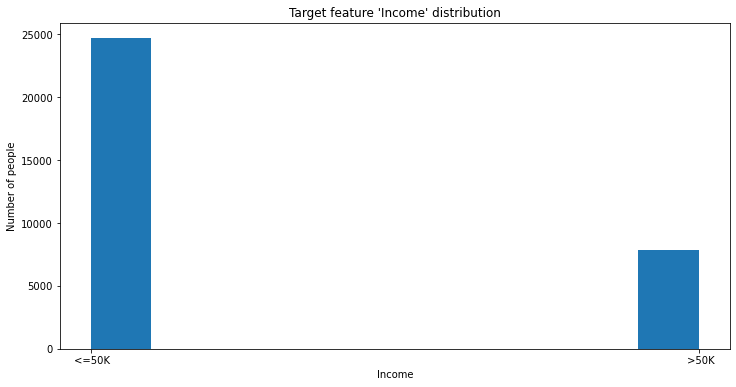

In [15]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax.hist(data1_train['Income'])
ax.set(title="Target feature 'Income' distribution",xlabel='Income',ylabel='Number of people')
plt.show()

We see that the target feature records are not categorically balanced. So we will focus our attention to 'f1-score' metric rather focusing on 'accuracy_score'.

## Step 2 - Exploratory data analysis

#### Univariate analysis of features

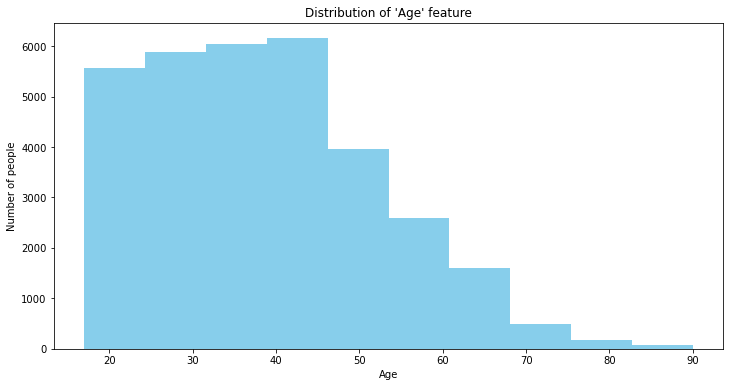

In [16]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax.set(title="Distribution of 'Age' feature", ylabel='Number of people', xlabel='Age')
ax.hist(data1_train['Age'],color='skyblue')
plt.show()

The above figure shows the age distribution among the entries in our dataset.The ages range from 17 to 90 years old with the majority of entries between the ages of 25 and 45 years.

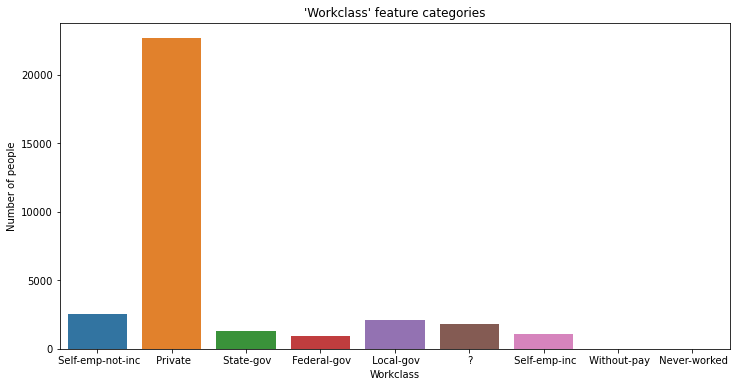

In [17]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax=sn.countplot(data1_train['Workclass'])
plt.title("'Workclass' feature categories")
plt.xlabel('Workclass')
plt.ylabel('Number of people')
plt.show()

For the records we analysing, most of the working class is employed by private sector. The dataset donot include the 'without-pay' and 'Never-worked' individual data.

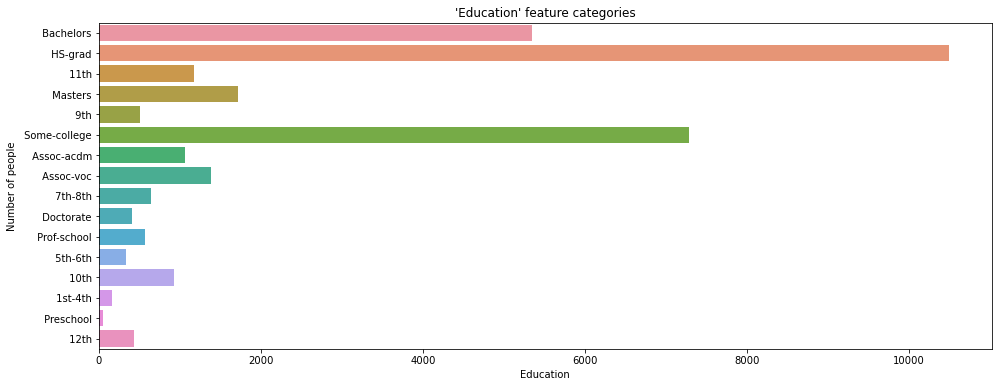

In [18]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(111)
ax=sn.countplot(y=data1_train['Education'])
plt.title("'Education' feature categories")
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.show()

From the above figure, most of the people we are considering for our prediction are High School graduates and some have any kind of college education. People with very less education are less in numbers.

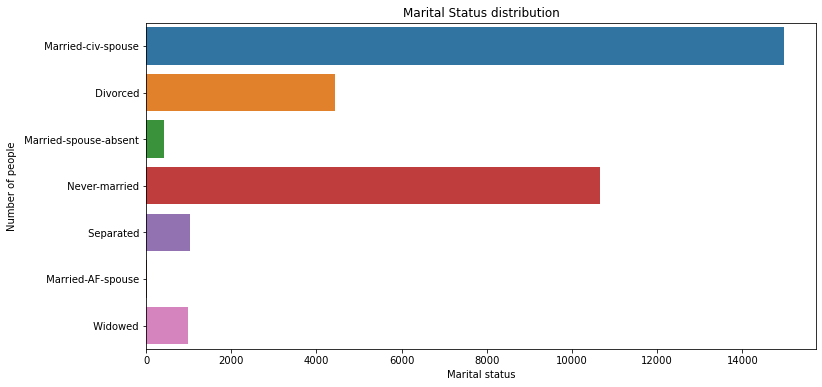

In [19]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax=sn.countplot(y=data1_train['Marital_status'])
ax.set(title="Marital Status distribution",xlabel='Marital status',ylabel='Number of people')
plt.show()

From above figure, the 'Marital_status' distribution of data is mostly occupied by 'Married-civ-spouse' and 'Never-married' individuals. The number of 'Widowed' and 'Seperated' individuals are almost same.

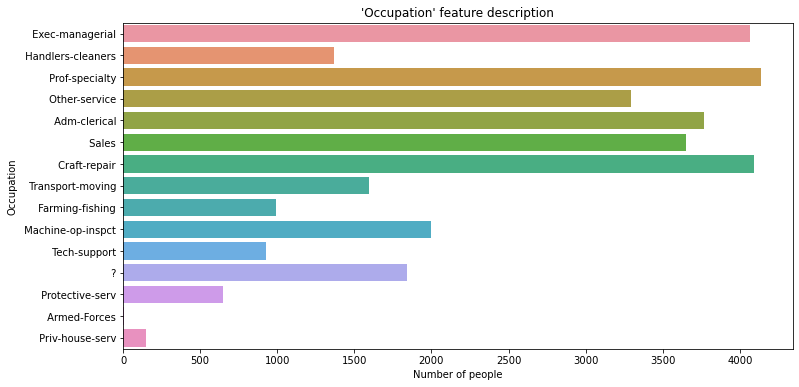

In [20]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax=sn.countplot(y=data1_train['Occupation'])
ax.set(title="'Occupation' feature description",xlabel='Number of people',ylabel='Occupation')
plt.show()

From the above figure, Exec-managerial, Prof-specialty and Craft-repair togetherly form the highest number of employment in our dataset. Followed by 'Adm-clerical','Sales','Other-service'.

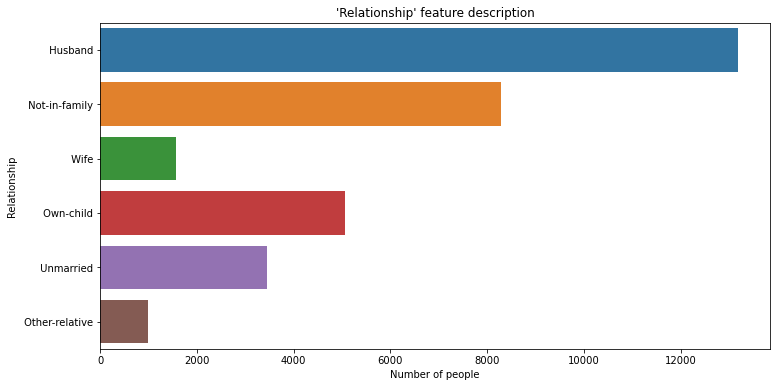

In [21]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax=sn.countplot(y=data1_train['Relationship'])
ax.set(title="'Relationship' feature description",xlabel='Number of people',ylabel='Relationship')
plt.show()

From the above figre,most of the individuals in our dataset are either a husband of the house or a bachelor who is not-in-family. Very few people stay with 'Other-relative'

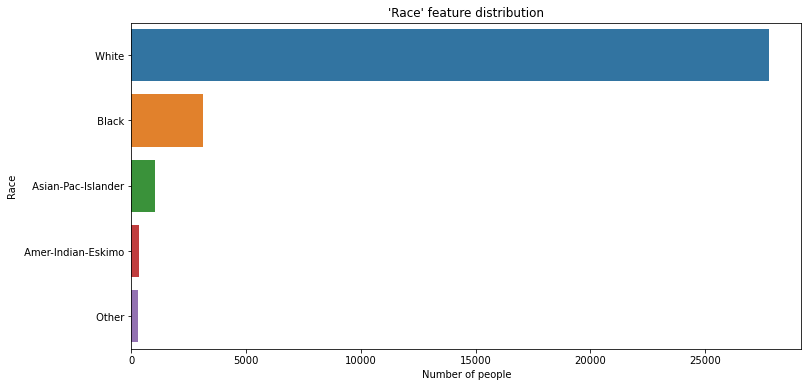

In [22]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax=sn.countplot(y=data1_train['Race'])
ax.set(title="'Race' feature distribution",xlabel='Number of people',ylabel='Race')
plt.show()

From the above fig, we can see that the records contain data of all races but most of the people are white , followed by Black ethnicity.

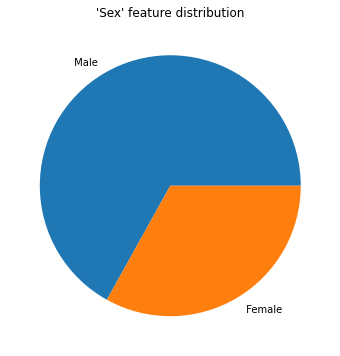

In [23]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax.pie(data1_train['Sex'].value_counts(),labels=data1_train['Sex'].unique())
ax.set(title="'Sex' feature distribution")
plt.show()

From above figure, we see that the records are available to us contain mostly male population as compared to female.

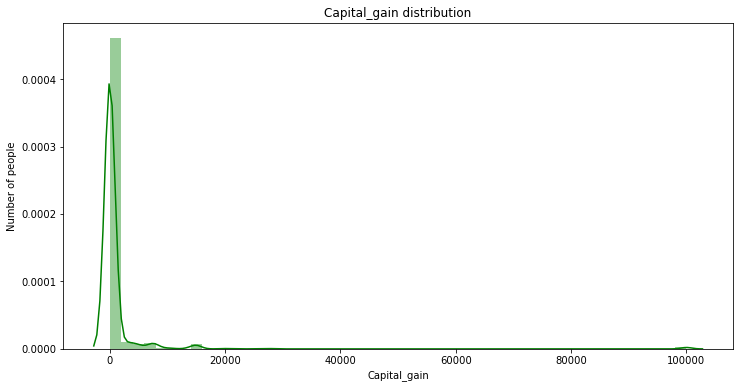

In [24]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax=sn.distplot(data1_train['Capital_gain'],color='green')
ax.set(title="Capital_gain distribution",xlabel='Capital_gain',ylabel='Number of people')
plt.show()

Most of the people have received net gains less than 10000. The data distribution for net gains received from the sale of property  is right skewed. We will handle the skewness in later steps.

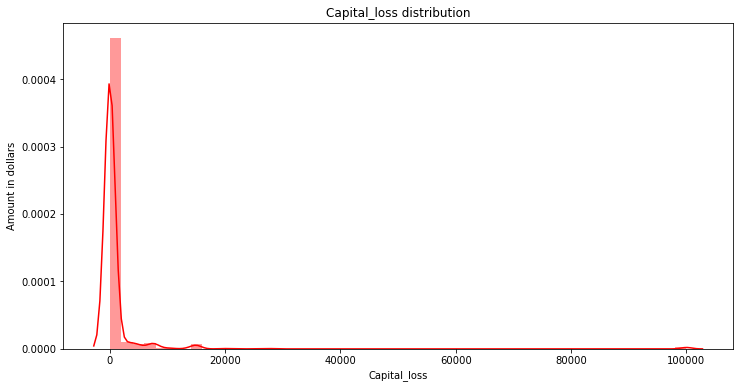

In [25]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax=sn.distplot(data1_train['Capital_gain'],color='red')
ax.set(title="Capital_loss distribution",xlabel='Capital_loss',ylabel='Amount in dollars')
plt.show()

Most of the people have incurred losses less than 10000. The data distribution for net losses received from the sale of property is right skewed. We will handle the skewness in later steps.

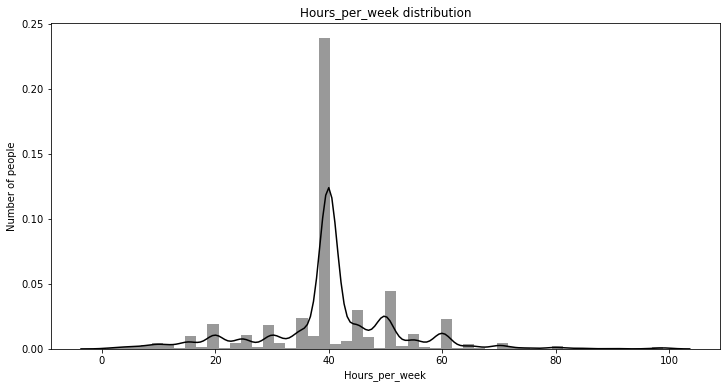

In [26]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax=sn.distplot(data1_train['Hours_per_week'],color='black')
ax.set(title="Hours_per_week distribution",xlabel='Hours_per_week',ylabel='Number of people')
plt.show()

The hours_per_week data is normally distributed with maximum people working 40 hours per week. The number of individuals working more than 60 hours per week is very less.

In [27]:
data1_train['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

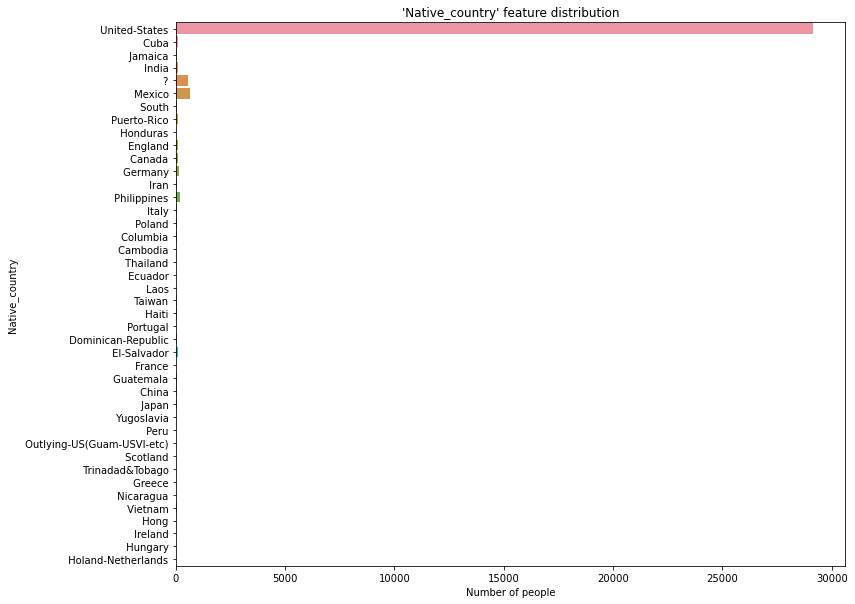

In [28]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax=sn.countplot(y=data1_train['Native_country'])
ax.set(title="'Native_country' feature distribution",xlabel='Number of people',ylabel='Native_country')
plt.show()

From above figure, we see that almost more than 90% of people are US citizens in our dataset.

#### Summary of Feature Analysis:

#### Age : 
    Age of the individual.
    Numerical feature with discrete values.
    Values are integers greater than zero.
    
#### Workclass:
    Employment status of the individual.
    Categorical feature with nominal values.
    Values are Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,Without-pay, Never-worked.  

#### fnlwgt (final weight)
    final weight. In other words, this is the number of people the census believes the entry represents.
    Values are integers greater than zero.
    Numerical feature with discrete values.
    
#### Education:
    Highest completed education of the individual where education categories are nominal.
    Categorical feature with ordinal values.
    Values: ' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th','Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',' Preschool', ' 12th'
    
#### Education_num:
    Highest completed education of the individual where education categories are numerical.
    Numerical feature with discrete values.
    Values: integers between 1-13.

#### Marital_status:
    Marital status of the individual.
    Categorical feature with nominal values.
    Values: ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'
    
#### Occupation:
    Occupation of the individual.
    Categorical feature with nominal values.
    Values: ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',' Priv-house-serv'
    
#### Relationship:
    Role of the individual in the family.
    Categorical feature with nominal values.
    Values: ' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried', ' Other-relative'
    
#### Race:
    Race of the individual.
    Categorical feature with nominal values.
    Values: ' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',' Other'
    
#### Sex:
    Sex of the individual.
    Categorical feature with nominal values.
    Values: Male & Female.
    
#### Capital_gain:
    The net gains received during the reference period from the sale of capital property.
    Numerical feature.
    Values: Numerical values greater than or equal to zero.
    
    
#### Capital_loss:
    The net losses incurred during the reference period from the sale of capital property.
    Numerical feature.
    Values: Numerical values greater than or equal to zero.
    
#### Hours_per_week:
    How many hours the individual works per week
    Numerical feature.
    Values: Numerical values greater than 0.
    
#### Native country:
    Native country of the individual.
    Cateforical feature with nominal values.
    Values: ' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
           ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
           ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
           ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
           ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
           ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
           ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
           ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
           ' Ireland', ' Hungary', ' Holand-Netherlands'
    
#### Income:
    Income of the individual.
    This is our target feature.
    Categorical feature with two categories: less than or equal to 50k and greater than 50k.

#### Analysis of independent features vs target feature

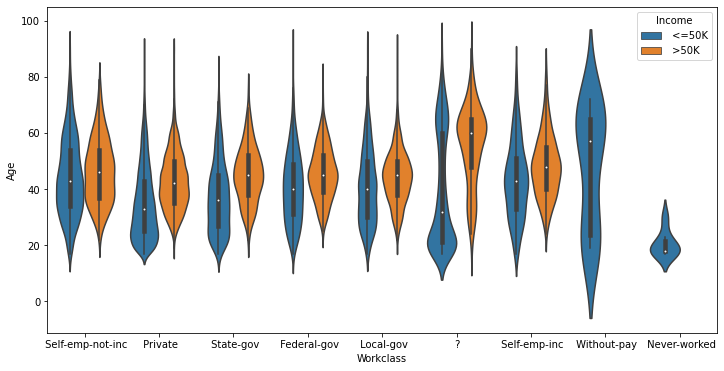

In [29]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax=sn.violinplot(x=data1_train['Workclass'],y=data1_train['Age'],hue=data1_train['Income'])
plt.show()

From above figure we see that, 

    for 'self-employed-not-inc' individuals, the income is less than or equal to 50k for most of them and the income is earned in this category by people between the age 30-50 years.
    
    for 'Private' sector individuals, most of the people earn more than 50k. In private sector, we see that the young adults have income less than 50k and as the age of the individuals increases, the income tends to increase.
    
    for 'State-gov' employees, at the start of career the income is less than or equal to 50k for most of the individuals, but as the age progresses the individuals with income more than 50k increases.
    
    for 'Federal-gov' employees, the distribution of individuals with income more than 50k is same as 'State-gov' employees but the individuals with income less than or equal to 50k are mostly young adults between age 25-40.
    
    for 'Local-gov Workclass' individuals who work for local administrations, most of the people with income more than 50k are densed between ages 40-50, while individuals with less than or equal to 50k salary are distributed between 20-50.
    
    for 'self-emp-inc' individuals, the distribution for both income levels is dense for the age range 40-50.
    
    The 'Without-pay' individuals are less dense between age group 25-35 and age less than 18.
    
    And as expected, 'Never-worked' individuals are mostly teenagers and few young adults below age 30.

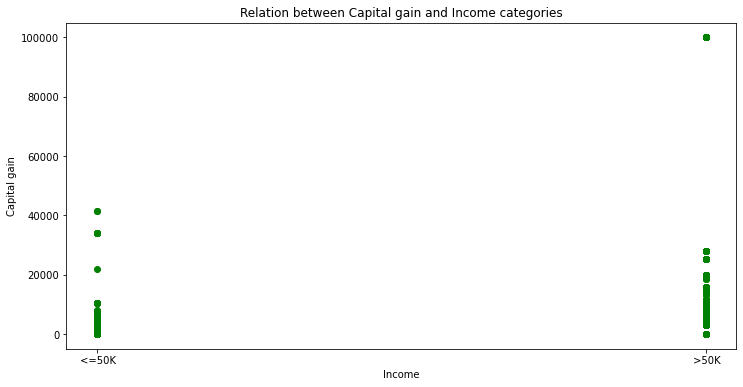

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(data1_train['Income'],data1_train['Capital_gain'],color='green')
plt.xlabel("Income")
plt.ylabel("Capital gain")
plt.title("Relation between Capital gain and Income categories")
plt.show()

from above plot between Income and Capital_gain, we can see that individuals with income less than or equal 50k have not incurred any significant capital gain which has been achieved by few of the individuals with income more than 50k.

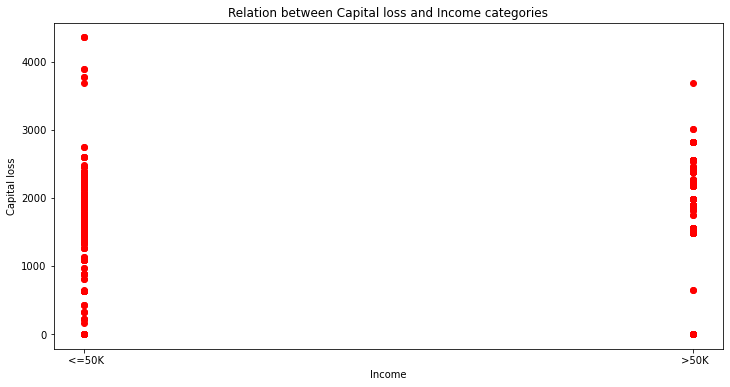

In [31]:
plt.figure(figsize=(12,6))
plt.scatter(data1_train['Income'],data1_train['Capital_loss'],color='red')
plt.xlabel("Income")
plt.ylabel("Capital loss")
plt.title("Relation between Capital loss and Income categories")
plt.show()

from above plot between Income and Capital_loss, we see that the individuals with income less than or equal to 50k have been more prone to capital losses as compared to individuals with income more than 50k.

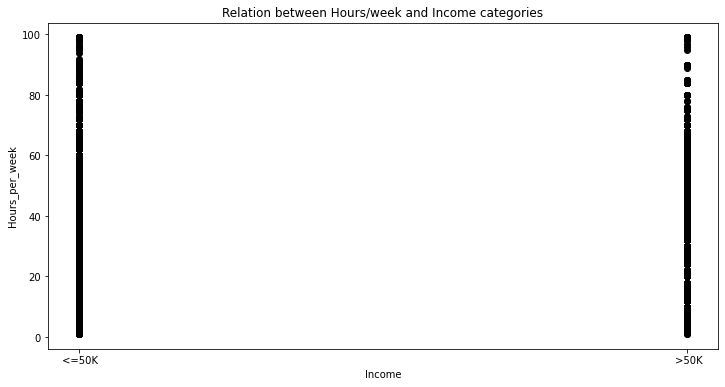

In [32]:
plt.figure(figsize=(12,6))
plt.scatter(data1_train['Income'],data1_train['Hours_per_week'],color='black')
plt.xlabel("Income")
plt.ylabel("Hours_per_week")
plt.title("Relation between Hours/week and Income categories")
plt.show()

from above plot between Income and Hours_per_week, we see that the working hours have been same distribution for both category of Income earners.

#### checking the correlation between features

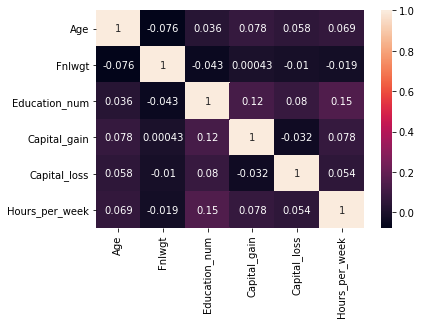

In [33]:
sn.heatmap(data1_train.corr(),annot=True)
plt.show()

from above heatmap of correlation between features, we observe that the features do not have any correlation between each other.

## Step-3 - Data Preprocessing

#### Replacing null values in the form of ' ?' with most frequent value for categorical features

In [34]:
round(data1_train.isnull().sum()/data1_train.shape[0]*100,2).astype('str')+"%"

Age               0.0%
Workclass         0.0%
Fnlwgt            0.0%
Education         0.0%
Education_num     0.0%
Marital_status    0.0%
Occupation        0.0%
Relationship      0.0%
Race              0.0%
Sex               0.0%
Capital_gain      0.0%
Capital_loss      0.0%
Hours_per_week    0.0%
Native_country    0.0%
Income            0.0%
dtype: object

We do not see any np.nan values present in our dataset.

In [35]:
round(data1_train.isin([' ?']).sum()/data1_train.shape[0]*100,2).astype('str')+"%"

Age                0.0%
Workclass         5.64%
Fnlwgt             0.0%
Education          0.0%
Education_num      0.0%
Marital_status     0.0%
Occupation        5.66%
Relationship       0.0%
Race               0.0%
Sex                0.0%
Capital_gain       0.0%
Capital_loss       0.0%
Hours_per_week     0.0%
Native_country    1.79%
Income             0.0%
dtype: object

We have ' ?' in 3 categorical features: Workclass, Occupation and Native_country

In [36]:
data1_train=data1_train.replace(" ?",np.nan)

In [37]:
round(data1_train.isnull().sum()/data1_train.shape[0]*100,2).astype('str')+"%"

Age                0.0%
Workclass         5.64%
Fnlwgt             0.0%
Education          0.0%
Education_num      0.0%
Marital_status     0.0%
Occupation        5.66%
Relationship       0.0%
Race               0.0%
Sex                0.0%
Capital_gain       0.0%
Capital_loss       0.0%
Hours_per_week     0.0%
Native_country    1.79%
Income             0.0%
dtype: object

Now , " ?" values have been converted to np.nan values and we can fill these places with most frequent value of that particular feature.

In [38]:
data1_train['Workclass'].fillna(data1_train['Workclass'].mode()[0],inplace=True)
data1_train['Occupation'].fillna(data1_train['Occupation'].mode()[0],inplace=True)
data1_train['Native_country'].fillna(data1_train['Native_country'].mode()[0],inplace=True)

#### Label encoding of 'object' datatype features

In [39]:
data1_train.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [40]:
le=LabelEncoder()
for col in data1_train.columns:
    if data1_train[col].dtypes=='object':
        data1_train[col]=le.fit_transform(data1_train[col])

In [41]:
data1_train.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Now all our dataset features are int32 or int64 datatype.

#### Seperate the dataset into independent features and target feature

In [42]:
x=data1_train.drop('Income',axis=1)
y=data1_train['Income']

#### Feature scaling

In [43]:
s=StandardScaler()
for col in x.columns:
    x[col]=s.fit_transform(x[col].values.reshape(-1,1))

#### Feature Selection

In [44]:
x.shape

(32536, 14)

In [63]:
pca=PCA(n_components=8)
x=pca.fit_transform(x)

In [46]:
x.shape

(32536, 8)

#### Target feature imbalance handling

<AxesSubplot:ylabel='Frequency'>

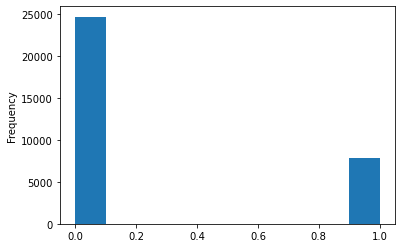

In [47]:
data1_train['Income'].plot.hist()

In [48]:
data1_train.shape

(32536, 15)

As the number of records are not large, we will perform oversampling which will add more rows to the minority value which is '1' in this case.

In [49]:
ros=RandomOverSampler(random_state=42)
ros.fit(x,y)
x_resampled,y_resampled=ros.fit_resample(x,y)

<AxesSubplot:ylabel='Frequency'>

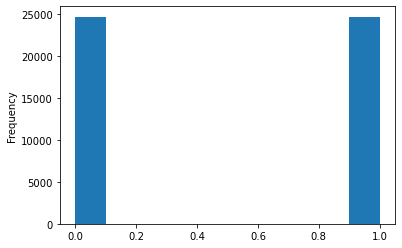

In [50]:
y_resampled.plot.hist()

Now our target feature is balanced with both the possible outcomes.

#### Finding best random state

In [51]:
# temporary storage
x_1=x_resampled
y_1=y_resampled
# intiating variables to store accuracy score and random state
maxAccu=0
maxRS=0
# iterating with various random states
for i in range(1,200):
    x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train_1,y_train_1)
    predrf_1=LR.predict(x_test_1)
    acc_1=accuracy_score(y_test_1,predrf_1)
    if acc_1>maxAccu:
        maxAccu=acc_1
        maxRs=i
print("Best Accuracy is ",maxAccu," at random state ",maxRs)

Best Accuracy is  0.7606895282498006  at random state  155


#### Split training and testing data

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.33,random_state=155)

In [53]:
print("x_train shape:", x_train.shape) 
print("x_test shape:", x_test.shape) 
print("y_train shape:", y_train.shape) 
print("y_test shape:", y_test.shape)

x_train shape: (33093, 8)
x_test shape: (16301, 8)
y_train shape: (33093,)
y_test shape: (16301,)


## Step-4 - Data Modelling

In [55]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
er = ExtraTreesClassifier()

In [66]:
#Cross validation
models = []

models.append(('Losgistic Regression', lr))
models.append(('Random Forest', rf))
models.append(('KNN', knn))
models.append(('Decision Tree', dt))
models.append(('Gaussian', gnb))
models.append(('ExtraTreesClassifier', er))

In [67]:
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

Losgistic Regression: 0.805723 
Random Forest: 0.832586 
KNN: 0.822136 
Decision Tree: 0.771177 
Gaussian: 0.778983 
ExtraTreesClassifier: 0.829758 


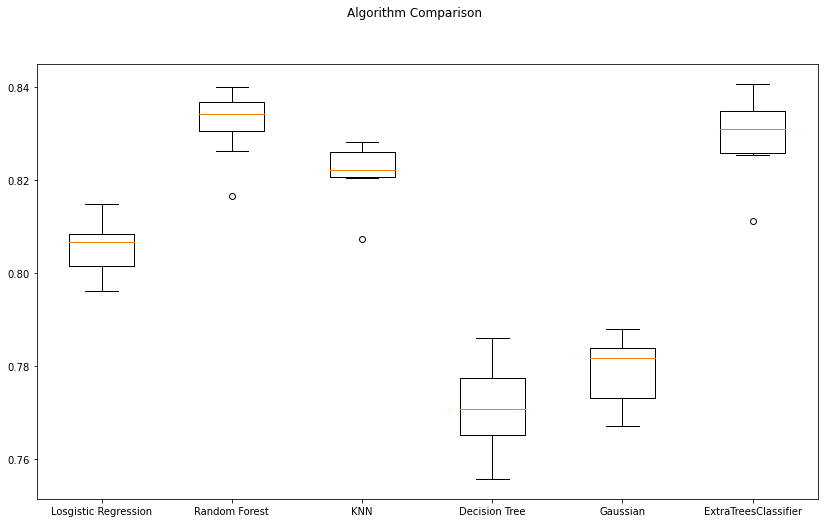

In [68]:
#Boxplot for algorithm comparision

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

After comparing different algorithms, we see that the Random Forest classifier has more accuracy.

In [78]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

print('Random Forest Classifier:')
print('Accuracy score:',round(accuracy_score(y_test,pred_rf) * 100, 2))
print("\n")
print(classification_report(y_test,pred_rf))

Random Forest Classifier:
Accuracy score: 90.89


              precision    recall  f1-score   support

           0       0.96      0.86      0.90      8197
           1       0.87      0.96      0.91      8104

    accuracy                           0.91     16301
   macro avg       0.91      0.91      0.91     16301
weighted avg       0.91      0.91      0.91     16301



## Step-5 - Hyper-Parameter tuning

In [75]:

parameters={'n_estimators':[int(x) for x in np.linspace(start = 40, stop = 150, num = 15)],'criterion':['gini','entropy']}

model=rf

grid=GridSearchCV(estimator=model,param_grid=parameters,cv=5)

grid.fit(x_train,y_train)

print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

0.8933612318101625
110
gini
{'criterion': 'gini', 'n_estimators': 110}


In [79]:
print('Random Forest Classifier:')
print('Accuracy score:',round(accuracy_score(y_test,pred_rf) * 100, 2))
print("\n")
print(classification_report(y_test,pred_rf))

Random Forest Classifier:
Accuracy score: 90.89


              precision    recall  f1-score   support

           0       0.96      0.86      0.90      8197
           1       0.87      0.96      0.91      8104

    accuracy                           0.91     16301
   macro avg       0.91      0.91      0.91     16301
weighted avg       0.91      0.91      0.91     16301



After parameter tuning, we see that the random forest classifier is giving us accuracy score of 90% and f1-score accuracy of 91%.

In [81]:
fin_model=RandomForestClassifier(n_estimators=grid.best_estimator_.n_estimators ,criterion=grid.best_estimator_.criterion)

## Step-6- Saving the model

In [82]:
import joblib
joblib.dump(fin_model,'Census Income prediction.pkl')

['Census Income prediction.pkl']